In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import sys,glob
import os

In [3]:
os.getcwd()

'C:\\Users\\Dominic\\CIIT'

In [4]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import re


# pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

# metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# machine learning models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression

from sklearn.tree import plot_tree
from sklearn import set_config
set_config(display='diagram')

from tqdm import tqdm
pd.set_option('display.max_columns', None)

In [5]:
# Retrieve customs dataset from July to September 2021.
path = Path("C:\\Users\\Dominic\\CIIT\\Dataset")
files = [str(file) for file in path.glob('*.xlsx')]

files

['C:\\Users\\Dominic\\CIIT\\Dataset\\Aug2021-1.xlsx',
 'C:\\Users\\Dominic\\CIIT\\Dataset\\Aug2021-2.xlsx',
 'C:\\Users\\Dominic\\CIIT\\Dataset\\Jul2021-1.xlsx',
 'C:\\Users\\Dominic\\CIIT\\Dataset\\Jul2021-2.xlsx',
 'C:\\Users\\Dominic\\CIIT\\Dataset\\Sep2021-1.xlsx',
 'C:\\Users\\Dominic\\CIIT\\Dataset\\Sep2021-2.xlsx']

In [6]:
%%time
# Combine all datasets in a dataframe 
df_all = pd.DataFrame()
df_backup = pd.DataFrame()
for file in tqdm(files):
    df_temp = pd.read_excel(file)
    
    # Extract the month and year from the file name
    pattern_month = r'(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)'
    pattern_year = r'\d{4}'
    month = re.findall(pattern_month, file)
    year = re.findall(pattern_year, file)
    
    # Add new columns month and year to the dataframe before combining the datasets
    df_temp['MONTH'] = month[0]
    df_temp['YEAR'] = year[0]
    
    print(f"File read: {file} has shape {df_temp.shape}")
    
    df_all = df_all.append(df_temp, sort=False)

  0%|          | 0/6 [00:00<?, ?it/s]

File read: C:\Users\Dominic\CIIT\Dataset\Aug2021-1.xlsx has shape (299999, 24)


<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 33%|███▎      | 2/6 [01:52<03:42, 55.58s/it]

File read: C:\Users\Dominic\CIIT\Dataset\Aug2021-2.xlsx has shape (265948, 24)


<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 50%|█████     | 3/6 [02:44<02:41, 53.89s/it]

File read: C:\Users\Dominic\CIIT\Dataset\Jul2021-1.xlsx has shape (299999, 24)


<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 67%|██████▋   | 4/6 [03:37<01:46, 53.21s/it]

File read: C:\Users\Dominic\CIIT\Dataset\Jul2021-2.xlsx has shape (306908, 24)


<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 83%|████████▎ | 5/6 [04:27<00:52, 52.28s/it]

File read: C:\Users\Dominic\CIIT\Dataset\Sep2021-1.xlsx has shape (299999, 24)


<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
100%|██████████| 6/6 [05:19<00:00, 53.25s/it]

File read: C:\Users\Dominic\CIIT\Dataset\Sep2021-2.xlsx has shape (308444, 24)
CPU times: total: 3min 2s
Wall time: 5min 19s


Table 1
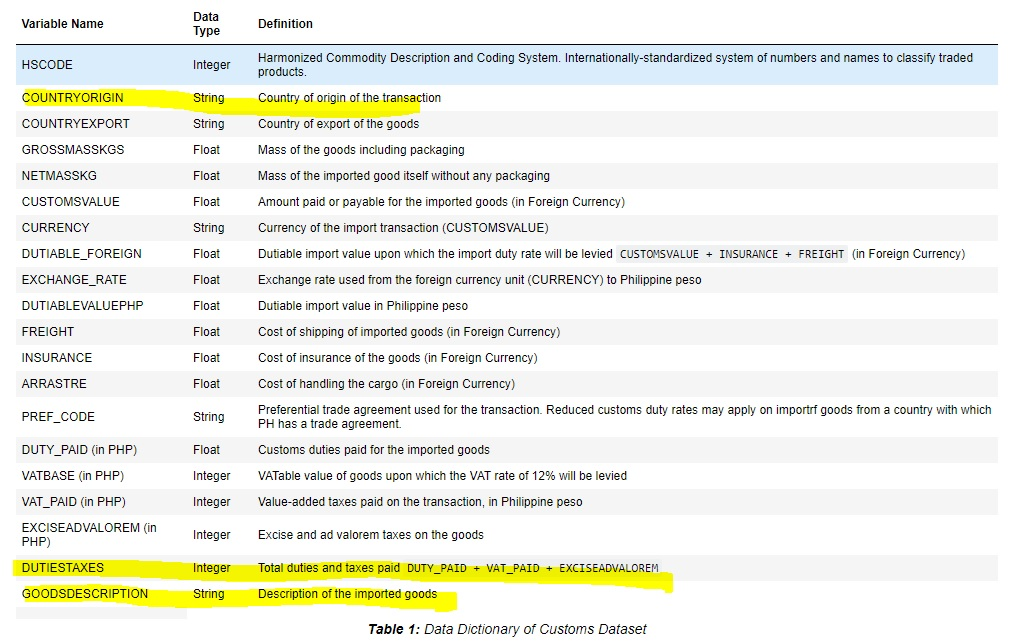

Table 2
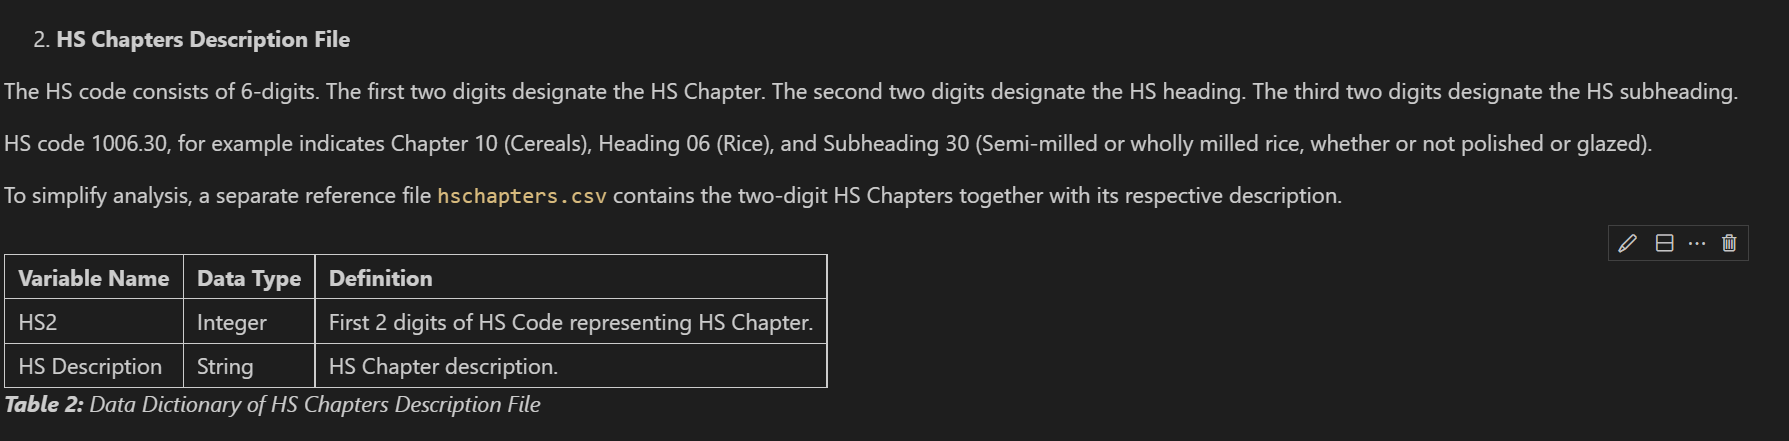

#Loading Data Set

In [7]:
#loading dataset
df_all.head()

,HSCODE,COUNTRYORIGIN,COUNTRYEXPORT,GROSSMASSKGS,NETMASSKGS,CUSTOMSVALUE,CURRENCY,DUTIABLE_FOREIGN,EXCHANGE_RATE,DUTIABLEVALUEPHP,FREIGHT,INSURANCE,ARRASTRE,PREF_CODE,DUTY_PAID,VATTAXBASE,VAT_PAID,EXCISEADVALOREM,DUTIESTAXES,GOODSDESCRIPTION,UOM,QUANTITY,MONTH,YEAR
0,72085100000,CN,CHINA,433047.0,433047.0,396015.11,USD,422712.94,49.87,21080694.32,18777.53,7920.30,74246.78,ACFTA,0.0,21184029.98,2542083.60,0.0,2542083.60,126 PCS OF HOT ROLLED PLATE,NaN,NaN,Aug,2021
1,72085100000,CN,CHINA,70872.0,70872.0,64371.60,USD,68711.29,49.87,3426632.03,3052.26,1287.43,12068.69,ACFTA,0.0,3454540.61,414544.87,0.0,414544.87,12 PCS OF HOT ROLLED PLATE,NaN,NaN,Aug,2021
2,72085200000,CN,CHINA,44450.0,44450.0,42691.46,USD,45569.56,49.87,2272553.95,2024.27,853.83,8004.00,ACFTA,0.0,2295531.73,275463.81,0.0,275463.81,29 PCS OF HOT ROLLED PLATE,NaN,NaN,Aug,2021
3,85042329000,TH,THAILAND,84393.0,79955.0,572900.00,USD,645816.00,49.87,32206843.92,50000.00,22916.00,12746.65,AFTA,0.0,32269314.45,3872317.73,0.0,3872317.73,1 UNIT- ABB BRAND (F16) 66-69MVA POWER TRANSFO...,Piece,1.0,Aug,2021
4,85042329000,TH,THAILAND,84493.0,80055.0,572900.00,USD,645328.00,49.87,32182507.36,50000.00,22428.00,12746.65,AFTA,0.0,32244947.47,3869393.70,0.0,3869393.70,1 UNIT- ABB BRAND (F16) 66-69MVA POWER TRANSFO...,Piece,1.0,Aug,2021


In [8]:
#loading HS Chapters csv file
file2 = "C:\\Users\\Dominic\\CIIT\\Guide\\hschapters.csv"
hschapters = pd.read_csv(file2)
hschapters.head()

,HS Code,Product descriptions
0,1,Live animals
1,2,Meat
2,3,Fish and crustaceans
3,4,Dairy produce
4,5,Products of animal origin


In [9]:
#Create new columns for HSCODE2
hs2 = df_all['HSCODE'].astype(str).str[:2].astype('int').tolist()
df_all.insert(loc=1, column='HSCODE2', value=hs2)
df_all

,HSCODE,HSCODE2,COUNTRYORIGIN,COUNTRYEXPORT,GROSSMASSKGS,NETMASSKGS,CUSTOMSVALUE,CURRENCY,DUTIABLE_FOREIGN,EXCHANGE_RATE,DUTIABLEVALUEPHP,FREIGHT,INSURANCE,ARRASTRE,PREF_CODE,DUTY_PAID,VATTAXBASE,VAT_PAID,EXCISEADVALOREM,DUTIESTAXES,GOODSDESCRIPTION,UOM,QUANTITY,MONTH,YEAR
0,72085100000,72,CN,CHINA,433047.0,433047.0,396015.11,USD,422712.94,49.870,21080694.32,18777.53,7920.30,74246.78,ACFTA,0.0,21184029.98,2542083.60,0.0,2542083.60,126 PCS OF HOT ROLLED PLATE,NaN,NaN,Aug,2021
1,72085100000,72,CN,CHINA,70872.0,70872.0,64371.60,USD,68711.29,49.870,3426632.03,3052.26,1287.43,12068.69,ACFTA,0.0,3454540.61,414544.87,0.0,414544.87,12 PCS OF HOT ROLLED PLATE,NaN,NaN,Aug,2021
2,72085200000,72,CN,CHINA,44450.0,44450.0,42691.46,USD,45569.56,49.870,2272553.95,2024.27,853.83,8004.00,ACFTA,0.0,2295531.73,275463.81,0.0,275463.81,29 PCS OF HOT ROLLED PLATE,NaN,NaN,Aug,2021
3,85042329000,85,TH,THAILAND,84393.0,79955.0,572900.00,USD,645816.00,49.870,32206843.92,50000.00,22916.00,12746.65,AFTA,0.0,32269314.45,3872317.73,0.0,3872317.73,1 UNIT- ABB BRAND (F16) 66-69MVA POWER TRANSFO...,Piece,1.0,Aug,2021
4,85042329000,85,TH,THAILAND,84493.0,80055.0,572900.00,USD,645328.00,49.870,32182507.36,50000.00,22428.00,12746.65,AFTA,0.0,32244947.47,3869393.70,0.0,3869393.70,1 UNIT- ABB BRAND (F16) 66-69MVA POWER TRANSFO...,Piece,1.0,Aug,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308439,70131000000,70,CN,CHINA,263.9,250.9,349.91,USD,398.01,50.393,20056.91,8.35,7.64,165.56,ACFTA,0.0,20295.26,2435.43,0.0,2435.43,1X40 CONTAINER STC - 208 PCS GLASS KITCHENWARE...,NaN,NaN,Sep,2021
308440,70131000000,70,CN,CHINA,195.0,182.0,230.84,USD,262.57,50.393,13231.69,5.51,5.04,109.22,ACFTA,0.0,13409.26,1609.11,0.0,1609.11,1X40 CONTAINER STC - 156 PCS GLASS KITCHENWARE...,NaN,NaN,Sep,2021
308441,70131000000,70,CN,CHINA,145.2,139.2,185.05,USD,210.49,50.393,10607.22,4.42,4.04,87.55,ACFTA,0.0,10761.41,1291.37,0.0,1291.37,1X40 CONTAINER STC - 72 PCS GLASS KITCHENWARE ...,NaN,NaN,Sep,2021
308442,70131000000,70,CN,CHINA,250.8,239.8,259.07,USD,294.68,50.393,14849.80,6.18,5.66,122.58,ACFTA,0.0,15041.78,1805.01,0.0,1805.01,1X40 CONTAINER STC - 396 PCS GLASS KITCHENWARE...,NaN,NaN,Sep,2021


In [10]:
#Merge two dataframe
new_df = df_all.merge(hschapters,how='left', left_on='HSCODE2', right_on='HS Code').drop(columns=['HS Code'])

In [11]:
#showing Dataframe
new_df.head()

,HSCODE,HSCODE2,COUNTRYORIGIN,COUNTRYEXPORT,GROSSMASSKGS,NETMASSKGS,CUSTOMSVALUE,CURRENCY,DUTIABLE_FOREIGN,EXCHANGE_RATE,DUTIABLEVALUEPHP,FREIGHT,INSURANCE,ARRASTRE,PREF_CODE,DUTY_PAID,VATTAXBASE,VAT_PAID,EXCISEADVALOREM,DUTIESTAXES,GOODSDESCRIPTION,UOM,QUANTITY,MONTH,YEAR,Product descriptions
0,72085100000,72,CN,CHINA,433047.0,433047.0,396015.11,USD,422712.94,49.87,21080694.32,18777.53,7920.30,74246.78,ACFTA,0.0,21184029.98,2542083.60,0.0,2542083.60,126 PCS OF HOT ROLLED PLATE,NaN,NaN,Aug,2021,Iron and steel
1,72085100000,72,CN,CHINA,70872.0,70872.0,64371.60,USD,68711.29,49.87,3426632.03,3052.26,1287.43,12068.69,ACFTA,0.0,3454540.61,414544.87,0.0,414544.87,12 PCS OF HOT ROLLED PLATE,NaN,NaN,Aug,2021,Iron and steel
2,72085200000,72,CN,CHINA,44450.0,44450.0,42691.46,USD,45569.56,49.87,2272553.95,2024.27,853.83,8004.00,ACFTA,0.0,2295531.73,275463.81,0.0,275463.81,29 PCS OF HOT ROLLED PLATE,NaN,NaN,Aug,2021,Iron and steel
3,85042329000,85,TH,THAILAND,84393.0,79955.0,572900.00,USD,645816.00,49.87,32206843.92,50000.00,22916.00,12746.65,AFTA,0.0,32269314.45,3872317.73,0.0,3872317.73,1 UNIT- ABB BRAND (F16) 66-69MVA POWER TRANSFO...,Piece,1.0,Aug,2021,Electrical machinery & equipment
4,85042329000,85,TH,THAILAND,84493.0,80055.0,572900.00,USD,645328.00,49.87,32182507.36,50000.00,22428.00,12746.65,AFTA,0.0,32244947.47,3869393.70,0.0,3869393.70,1 UNIT- ABB BRAND (F16) 66-69MVA POWER TRANSFO...,Piece,1.0,Aug,2021,Electrical machinery & equipment


In [12]:
#creating copy of dataframe
new_df_process = new_df.copy(deep=True)

#Preprocessing and Data Cleaning

In [13]:
#showing dataset info
new_df_process.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1781297 entries, 0 to 1781296
Data columns (total 26 columns):
 #   Column                Dtype  
---  ------                -----  
 0   HSCODE                int64  
 1   HSCODE2               int64  
 2   COUNTRYORIGIN         object 
 3   COUNTRYEXPORT         object 
 4   GROSSMASSKGS          float64
 5   NETMASSKGS            float64
 6   CUSTOMSVALUE          float64
 7   CURRENCY              object 
 8   DUTIABLE_FOREIGN      float64
 9   EXCHANGE_RATE         float64
 10  DUTIABLEVALUEPHP      float64
 11  FREIGHT               float64
 12  INSURANCE             float64
 13  ARRASTRE              float64
 14  PREF_CODE             object 
 15  DUTY_PAID             float64
 16  VATTAXBASE            float64
 17  VAT_PAID              float64
 18  EXCISEADVALOREM       float64
 19  DUTIESTAXES           float64
 20  GOODSDESCRIPTION      object 
 21  UOM                   object 
 22  QUANTITY              float64
 23  MONTH  

##Correcting Data Types

In [14]:
#correcting data types
new_df_process["YEAR"] = new_df_process["YEAR"].astype(int)
new_df_process.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1781297 entries, 0 to 1781296
Data columns (total 26 columns):
 #   Column                Dtype  
---  ------                -----  
 0   HSCODE                int64  
 1   HSCODE2               int64  
 2   COUNTRYORIGIN         object 
 3   COUNTRYEXPORT         object 
 4   GROSSMASSKGS          float64
 5   NETMASSKGS            float64
 6   CUSTOMSVALUE          float64
 7   CURRENCY              object 
 8   DUTIABLE_FOREIGN      float64
 9   EXCHANGE_RATE         float64
 10  DUTIABLEVALUEPHP      float64
 11  FREIGHT               float64
 12  INSURANCE             float64
 13  ARRASTRE              float64
 14  PREF_CODE             object 
 15  DUTY_PAID             float64
 16  VATTAXBASE            float64
 17  VAT_PAID              float64
 18  EXCISEADVALOREM       float64
 19  DUTIESTAXES           float64
 20  GOODSDESCRIPTION      object 
 21  UOM                   object 
 22  QUANTITY              float64
 23  MONTH  

Changed datatype of Year column into an integer

##Checking Missing Values

In [15]:
#checking for missing values
new_df_process.isnull().sum()

HSCODE                        0
HSCODE2                       0
COUNTRYORIGIN                22
COUNTRYEXPORT                 0
GROSSMASSKGS                  0
NETMASSKGS                    0
CUSTOMSVALUE                  0
CURRENCY                      0
DUTIABLE_FOREIGN              0
EXCHANGE_RATE                 0
DUTIABLEVALUEPHP              0
FREIGHT                       0
INSURANCE                     0
ARRASTRE                      0
PREF_CODE               1436368
DUTY_PAID                     0
VATTAXBASE                    0
VAT_PAID                      0
EXCISEADVALOREM               0
DUTIESTAXES                   0
GOODSDESCRIPTION              0
UOM                     1447487
QUANTITY                1235615
MONTH                         0
YEAR                          0
Product descriptions          0
dtype: int64

In [16]:
#dropping missing values in specific column
new_df_process.dropna(subset=["COUNTRYORIGIN"],inplace=True)

In [17]:
#dropping columns with missing values
new_df_process = new_df_process.drop(columns={"PREF_CODE","UOM","QUANTITY"})

In [18]:
#rechecking missing values
new_df_process.isnull().sum()

HSCODE                  0
HSCODE2                 0
COUNTRYORIGIN           0
COUNTRYEXPORT           0
GROSSMASSKGS            0
NETMASSKGS              0
CUSTOMSVALUE            0
CURRENCY                0
DUTIABLE_FOREIGN        0
EXCHANGE_RATE           0
DUTIABLEVALUEPHP        0
FREIGHT                 0
INSURANCE               0
ARRASTRE                0
DUTY_PAID               0
VATTAXBASE              0
VAT_PAID                0
EXCISEADVALOREM         0
DUTIESTAXES             0
GOODSDESCRIPTION        0
MONTH                   0
YEAR                    0
Product descriptions    0
dtype: int64

##Checking Duplicates

In [19]:
#checking duplicates
new_df_process.duplicated().sum()

31573

In [20]:
#dropping duplicates and rechecking duplicates
new_df_process.drop_duplicates(inplace=True)
new_df_process.duplicated().sum()

0

In [21]:
#creating preprocess dataframe
df_processed = new_df_process.copy(deep=True)

#Exploratory Data Analysis


In [22]:
#showing datafram
df_processed.head()

,HSCODE,HSCODE2,COUNTRYORIGIN,COUNTRYEXPORT,GROSSMASSKGS,NETMASSKGS,CUSTOMSVALUE,CURRENCY,DUTIABLE_FOREIGN,EXCHANGE_RATE,DUTIABLEVALUEPHP,FREIGHT,INSURANCE,ARRASTRE,DUTY_PAID,VATTAXBASE,VAT_PAID,EXCISEADVALOREM,DUTIESTAXES,GOODSDESCRIPTION,MONTH,YEAR,Product descriptions
0,72085100000,72,CN,CHINA,433047.0,433047.0,396015.11,USD,422712.94,49.87,21080694.32,18777.53,7920.30,74246.78,0.0,21184029.98,2542083.60,0.0,2542083.60,126 PCS OF HOT ROLLED PLATE,Aug,2021,Iron and steel
1,72085100000,72,CN,CHINA,70872.0,70872.0,64371.60,USD,68711.29,49.87,3426632.03,3052.26,1287.43,12068.69,0.0,3454540.61,414544.87,0.0,414544.87,12 PCS OF HOT ROLLED PLATE,Aug,2021,Iron and steel
2,72085200000,72,CN,CHINA,44450.0,44450.0,42691.46,USD,45569.56,49.87,2272553.95,2024.27,853.83,8004.00,0.0,2295531.73,275463.81,0.0,275463.81,29 PCS OF HOT ROLLED PLATE,Aug,2021,Iron and steel
3,85042329000,85,TH,THAILAND,84393.0,79955.0,572900.00,USD,645816.00,49.87,32206843.92,50000.00,22916.00,12746.65,0.0,32269314.45,3872317.73,0.0,3872317.73,1 UNIT- ABB BRAND (F16) 66-69MVA POWER TRANSFO...,Aug,2021,Electrical machinery & equipment
4,85042329000,85,TH,THAILAND,84493.0,80055.0,572900.00,USD,645328.00,49.87,32182507.36,50000.00,22428.00,12746.65,0.0,32244947.47,3869393.70,0.0,3869393.70,1 UNIT- ABB BRAND (F16) 66-69MVA POWER TRANSFO...,Aug,2021,Electrical machinery & equipment


In [23]:
#getting dataframe information
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1749702 entries, 0 to 1781296
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   HSCODE                int64  
 1   HSCODE2               int64  
 2   COUNTRYORIGIN         object 
 3   COUNTRYEXPORT         object 
 4   GROSSMASSKGS          float64
 5   NETMASSKGS            float64
 6   CUSTOMSVALUE          float64
 7   CURRENCY              object 
 8   DUTIABLE_FOREIGN      float64
 9   EXCHANGE_RATE         float64
 10  DUTIABLEVALUEPHP      float64
 11  FREIGHT               float64
 12  INSURANCE             float64
 13  ARRASTRE              float64
 14  DUTY_PAID             float64
 15  VATTAXBASE            float64
 16  VAT_PAID              float64
 17  EXCISEADVALOREM       float64
 18  DUTIESTAXES           float64
 19  GOODSDESCRIPTION      object 
 20  MONTH                 object 
 21  YEAR                  int32  
 22  Product descriptions  object 
dtypes: floa

In [24]:
#getting the shape of our dataframe
df_processed.shape

(1749702, 23)

In [25]:
#creating dataframe for future use
df_ml = df_processed[["HSCODE2","COUNTRYEXPORT","DUTIESTAXES","GROSSMASSKGS","FREIGHT","EXCISEADVALOREM","VAT_PAID","VATTAXBASE","DUTIABLEVALUEPHP","GOODSDESCRIPTION","Product descriptions"]]
df_ml

,HSCODE2,COUNTRYEXPORT,DUTIESTAXES,GROSSMASSKGS,FREIGHT,EXCISEADVALOREM,VAT_PAID,VATTAXBASE,DUTIABLEVALUEPHP,GOODSDESCRIPTION,Product descriptions
0,72,CHINA,2542083.60,433047.0,18777.53,0.0,2542083.60,21184029.98,21080694.32,126 PCS OF HOT ROLLED PLATE,Iron and steel
1,72,CHINA,414544.87,70872.0,3052.26,0.0,414544.87,3454540.61,3426632.03,12 PCS OF HOT ROLLED PLATE,Iron and steel
2,72,CHINA,275463.81,44450.0,2024.27,0.0,275463.81,2295531.73,2272553.95,29 PCS OF HOT ROLLED PLATE,Iron and steel
3,85,THAILAND,3872317.73,84393.0,50000.00,0.0,3872317.73,32269314.45,32206843.92,1 UNIT- ABB BRAND (F16) 66-69MVA POWER TRANSFO...,Electrical machinery & equipment
4,85,THAILAND,3869393.70,84493.0,50000.00,0.0,3869393.70,32244947.47,32182507.36,1 UNIT- ABB BRAND (F16) 66-69MVA POWER TRANSFO...,Electrical machinery & equipment
...,...,...,...,...,...,...,...,...,...,...,...
1781292,70,CHINA,2435.43,263.9,8.35,0.0,2435.43,20295.26,20056.91,1X40 CONTAINER STC - 208 PCS GLASS KITCHENWARE...,Glass and glassware
1781293,70,CHINA,1609.11,195.0,5.51,0.0,1609.11,13409.26,13231.69,1X40 CONTAINER STC - 156 PCS GLASS KITCHENWARE...,Glass and glassware
1781294,70,CHINA,1291.37,145.2,4.42,0.0,1291.37,10761.41,10607.22,1X40 CONTAINER STC - 72 PCS GLASS KITCHENWARE ...,Glass and glassware
1781295,70,CHINA,1805.01,250.8,6.18,0.0,1805.01,15041.78,14849.80,1X40 CONTAINER STC - 396 PCS GLASS KITCHENWARE...,Glass and glassware


In [26]:
#getting descriptive statistics
df_processed.describe()

,HSCODE,HSCODE2,GROSSMASSKGS,NETMASSKGS,CUSTOMSVALUE,DUTIABLE_FOREIGN,EXCHANGE_RATE,DUTIABLEVALUEPHP,FREIGHT,INSURANCE,ARRASTRE,DUTY_PAID,VATTAXBASE,VAT_PAID,EXCISEADVALOREM,DUTIESTAXES,YEAR
count,1.749702e+06,1.749702e+06,1.749702e+06,1.749702e+06,1.749702e+06,1.749702e+06,1.749702e+06,1.749702e+06,1.749702e+06,1.749702e+06,1.749702e+06,1.749702e+06,1.749702e+06,1.749702e+06,1.749702e+06,1.749702e+06,1749702.0
mean,6.966754e+10,6.998966e+01,1.913129e+04,1.888723e+04,3.485825e+04,3.637344e+04,4.937233e+01,9.534677e+05,1.009508e+03,4.545975e+02,2.680216e+03,1.874784e+04,1.009883e+06,1.078259e+05,2.697244e+04,1.561349e+05,2021.0
std,2.315225e+10,2.215191e+01,8.307186e+05,8.302976e+05,1.352403e+06,1.392649e+06,5.524202e+00,1.438568e+07,3.811524e+04,2.355781e+04,8.804165e+04,3.340076e+05,1.600756e+07,1.805870e+06,4.161017e+06,5.336441e+06,0.0
min,1.012100e+09,1.000000e+01,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.494000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2021.0
25%,4.819600e+10,4.800000e+01,1.180000e+00,1.000000e+00,1.050000e+02,1.226900e+02,4.987000e+01,6.067142e+03,2.500000e+00,9.100000e-01,0.000000e+00,0.000000e+00,6.997763e+03,7.213200e+02,0.000000e+00,1.016390e+03,2021.0
50%,8.421239e+10,8.400000e+01,1.511000e+01,1.324000e+01,6.397300e+02,7.041400e+02,5.001200e+01,3.443567e+04,2.069000e+01,8.000000e+00,0.000000e+00,7.481000e+01,3.726746e+04,3.948085e+03,0.000000e+00,5.513245e+03,2021.0
75%,8.536910e+10,8.500000e+01,4.360000e+02,3.875000e+02,4.455148e+03,4.792628e+03,5.034200e+01,2.276807e+05,1.232675e+02,6.264000e+01,2.039000e+02,1.795027e+03,2.413705e+05,2.527394e+04,0.000000e+00,3.433755e+04,2021.0
max,9.706000e+10,9.700000e+01,2.920480e+08,2.920480e+08,7.335117e+08,7.599950e+08,7.029300e+01,4.124558e+09,1.738710e+07,1.390188e+07,4.351515e+07,1.259639e+08,5.183914e+09,6.220697e+08,5.136870e+09,5.793670e+09,2021.0


In [27]:
df_pair = df_ml[["COUNTRYEXPORT","DUTIESTAXES","DUTIABLEVALUEPHP","FREIGHT","GROSSMASSKGS"]]
df_pair

,COUNTRYEXPORT,DUTIESTAXES,DUTIABLEVALUEPHP,FREIGHT,GROSSMASSKGS
0,CHINA,2542083.60,21080694.32,18777.53,433047.0
1,CHINA,414544.87,3426632.03,3052.26,70872.0
2,CHINA,275463.81,2272553.95,2024.27,44450.0
3,THAILAND,3872317.73,32206843.92,50000.00,84393.0
4,THAILAND,3869393.70,32182507.36,50000.00,84493.0
...,...,...,...,...,...
1781292,CHINA,2435.43,20056.91,8.35,263.9
1781293,CHINA,1609.11,13231.69,5.51,195.0
1781294,CHINA,1291.37,10607.22,4.42,145.2
1781295,CHINA,1805.01,14849.80,6.18,250.8


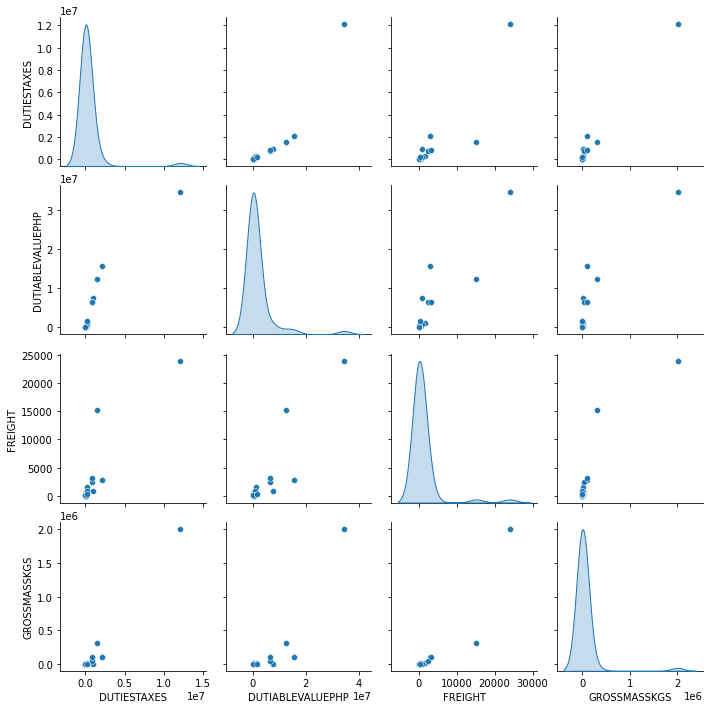

In [28]:
sns.pairplot(df_pair.sample(50),diag_kind='kde')

#Explanatory Data Analysis

### How many countries we import from?

In [29]:
#getting country counts
countries_count = df_processed["COUNTRYEXPORT"].value_counts()
len(countries_count)

168

###Top Product categories imported into the country for Q3 2021 (July, August, September)

(array([0.0e+00, 2.0e+09, 4.0e+09, 6.0e+09, 8.0e+09, 1.0e+10, 1.2e+10,
        1.4e+10, 1.6e+10, 1.8e+10]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

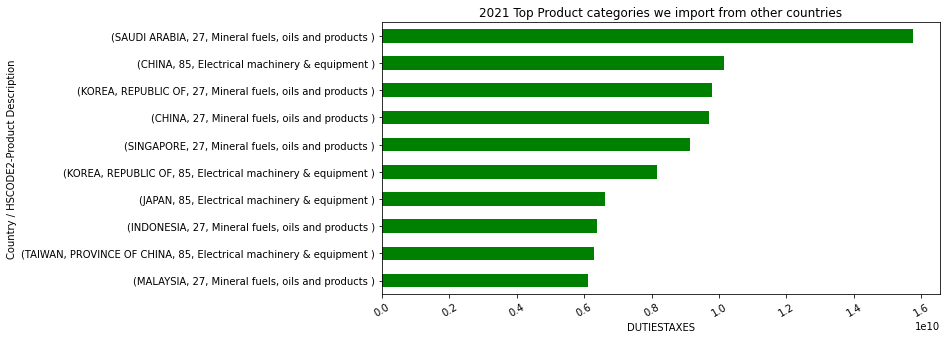

In [30]:
#plotting top product categories we import into the country
fig = plt.figure(figsize=(10,5))
top_products = df_processed.groupby(["COUNTRYEXPORT","HSCODE2","Product descriptions"])["DUTIESTAXES"].sum().sort_values(ascending=True).tail(10)
top_products.plot(kind="barh", color="g")

#adding labels
plt.ylabel("Country / HSCODE2-Product Description")
plt.xlabel("DUTIESTAXES")
plt.title("2021 Top Product categories we import from other countries")
plt.xticks(rotation=30)

#Creating ML LogisticRegression Model

In [31]:
#Filtering Data Frame focusing on HSCODE2 = 27 and 85
df_filtered = df_processed.loc[(df_processed["HSCODE2"] == 27) | (df_processed["HSCODE2"] == 85)]
df_filtered

,HSCODE,HSCODE2,COUNTRYORIGIN,COUNTRYEXPORT,GROSSMASSKGS,NETMASSKGS,CUSTOMSVALUE,CURRENCY,DUTIABLE_FOREIGN,EXCHANGE_RATE,DUTIABLEVALUEPHP,FREIGHT,INSURANCE,ARRASTRE,DUTY_PAID,VATTAXBASE,VAT_PAID,EXCISEADVALOREM,DUTIESTAXES,GOODSDESCRIPTION,MONTH,YEAR,Product descriptions
3,85042329000,85,TH,THAILAND,84393.00,79955.00,572900.00,USD,645816.00,49.870,32206843.92,50000.00,22916.00,12746.65,0.00,32269314.45,3872317.73,0.0,3872317.73,1 UNIT- ABB BRAND (F16) 66-69MVA POWER TRANSFO...,Aug,2021,Electrical machinery & equipment
4,85042329000,85,TH,THAILAND,84493.00,80055.00,572900.00,USD,645328.00,49.870,32182507.36,50000.00,22428.00,12746.65,0.00,32244947.47,3869393.70,0.0,3869393.70,1 UNIT- ABB BRAND (F16) 66-69MVA POWER TRANSFO...,Aug,2021,Electrical machinery & equipment
35,27011900000,27,ID,INDONESIA,27500000.00,27500000.00,1299050.00,USD,1692075.00,50.235,85001387.63,392425.00,600.00,3355000.00,0.00,93601844.36,11232221.32,4125000.0,15357221.32,"27,500 MT INDONESIAN STEAM COAL IN BULK",Aug,2021,"Mineral fuels, oils and products"
153,85042329000,85,CN,CHINA,104536.88,97647.68,497577.00,USD,563216.16,50.342,28353427.92,55057.37,10581.79,192713.91,0.00,28575276.69,3429033.20,0.0,3429033.20,ONE SET OF TRANSFORMER 90MVA/230KV AND ACCESSO...,Aug,2021,Electrical machinery & equipment
154,27101960000,27,CN,CHINA,7068.12,6602.32,33643.00,USD,38081.10,50.342,1917078.74,3722.63,715.47,13030.09,0.00,2222099.63,266651.96,269430.0,536081.96,TRANSFORMER OIL WITH 26943 LITERS,Aug,2021,"Mineral fuels, oils and products"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781182,85122020000,85,CN,CHINA,155.17,77.91,1245.40,USD,1434.15,50.393,72271.12,163.84,24.91,588.06,2168.13,75329.57,9039.55,0.0,11207.68,"(RIGHT HEADLIGHT ASSY, RH TAILLIGHT ASSY ETC.)...",Sep,2021,Electrical machinery & equipment
1781191,85124000000,85,CN,CHINA,19.45,9.77,156.09,USD,179.75,50.393,9058.14,20.54,3.12,73.70,452.91,9824.99,1179.00,0.0,1631.91,LEFT WIPER BLADE ASSY ETC. VARIOUS SPARE PARTS...,Sep,2021,Electrical machinery & equipment
1781202,85269190000,85,CN,CHINA,5.74,2.88,46.08,USD,53.06,50.393,2673.85,6.06,0.92,21.76,0.00,2929.58,351.55,0.0,351.55,"REAR PARKING RADIO PROBE, VARIOUS SPARE PARTS ...",Sep,2021,Electrical machinery & equipment
1781203,85361019000,85,CN,CHINA,3.21,1.61,25.80,USD,29.71,50.393,1497.17,3.39,0.52,12.18,0.00,1742.17,209.06,0.0,209.06,"FUSE, VARIOUS SPARE PARTS FOR THE ASSY OF SOJI...",Sep,2021,Electrical machinery & equipment


In [32]:
#Creating new column "Label" 
df_filtered['Label'] = df_filtered['HSCODE2'].astype(str)

C:\Users\Dominic\AppData\Local\Temp\ipykernel_8004\1906993597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Label'] = df_filtered['HSCODE2'].astype(str)


In [33]:
df_filtered['Label']

3          85
4          85
35         27
153        85
154        27
           ..
1781182    85
1781191    85
1781202    85
1781203    85
1781204    85
Name: Label, Length: 357735, dtype: object

In [34]:
 #df_filtered['Label'] = df_filtered['Label'].replace({"27":"Mineral fuels, oils and products","85":'Electrical machinery & equipment',})

In [35]:
#getting value_counts
df_filtered['Label'].value_counts()

85    347720
27     10015
Name: Label, dtype: int64

<AxesSubplot:>

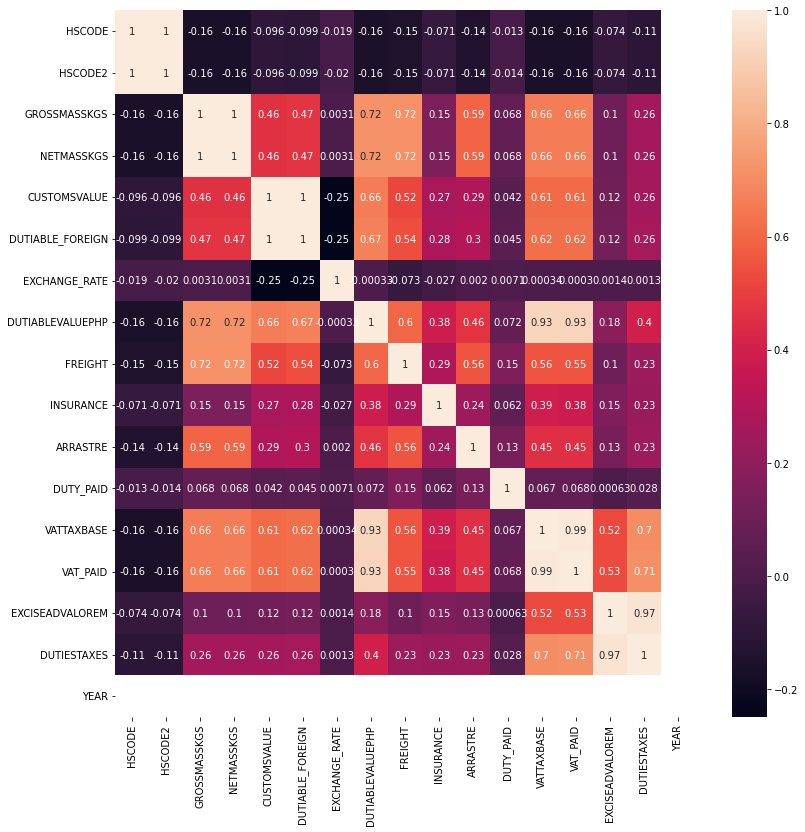

In [36]:
#Building correlation matrix
plt.figure(figsize=(13,13))
sns.heatmap(df_filtered.corr(),annot=True)

###Preprocessing

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_cat = df_filtered[["MONTH"]]
x_num = df_filtered[["DUTIESTAXES","DUTIABLEVALUEPHP","EXCISEADVALOREM","VAT_PAID","VATTAXBASE","FREIGHT"]]
#y = df_filtered["Label"]

In [39]:
#one hot encode
x_cat_dum = pd.get_dummies(x_cat)
x_cat_dum

,MONTH_Aug,MONTH_Jul,MONTH_Sep
3,1,0,0
4,1,0,0
35,1,0,0
153,1,0,0
154,1,0,0
...,...,...,...
1781182,0,0,1
1781191,0,0,1
1781202,0,0,1
1781203,0,0,1


In [40]:
#Scale numerical columns
x_num

,DUTIESTAXES,DUTIABLEVALUEPHP,EXCISEADVALOREM,VAT_PAID,VATTAXBASE,FREIGHT
3,3872317.73,32206843.92,0.0,3872317.73,32269314.45,50000.00
4,3869393.70,32182507.36,0.0,3869393.70,32244947.47,50000.00
35,15357221.32,85001387.63,4125000.0,11232221.32,93601844.36,392425.00
153,3429033.20,28353427.92,0.0,3429033.20,28575276.69,55057.37
154,536081.96,1917078.74,269430.0,266651.96,2222099.63,3722.63
...,...,...,...,...,...,...
1781182,11207.68,72271.12,0.0,9039.55,75329.57,163.84
1781191,1631.91,9058.14,0.0,1179.00,9824.99,20.54
1781202,351.55,2673.85,0.0,351.55,2929.58,6.06
1781203,209.06,1497.17,0.0,209.06,1742.17,3.39


In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
x_num_scaled = scaler.fit_transform(x_num)


In [42]:
#x_num Scaled
x_num_scaled

array([[6.68370384e-04, 7.80855550e-03, 0.00000000e+00, 6.22489350e-03,
        6.22488873e-03, 1.90798291e-02],
       [6.67865690e-04, 7.80265510e-03, 0.00000000e+00, 6.22019302e-03,
        6.22018823e-03, 1.90798291e-02],
       [2.65068949e-03, 2.06086028e-02, 8.03018185e-04, 1.80562098e-02,
        1.80562051e-02, 1.49748038e-01],
       ...,
       [6.06782875e-08, 6.48275447e-07, 0.00000000e+00, 5.65129585e-07,
        5.60317908e-07, 2.31247528e-06],
       [3.60842065e-08, 3.62989155e-07, 0.00000000e+00, 3.36071657e-07,
        3.31261265e-07, 1.29361241e-06],
       [3.66313553e-08, 3.69346199e-07, 0.00000000e+00, 3.41167549e-07,
        3.36363587e-07, 1.31650821e-06]])

In [43]:
#x_num scaled convert back to dataframe
x_num_scaled_df = pd.DataFrame(x_num_scaled)
x_num_scaled_df

,0,1,2,3,4,5
0,6.683704e-04,7.808556e-03,0.000000,6.224894e-03,6.224889e-03,0.019080
1,6.678657e-04,7.802655e-03,0.000000,6.220193e-03,6.220188e-03,0.019080
2,2.650689e-03,2.060860e-02,0.000803,1.805621e-02,1.805621e-02,0.149748
3,5.918585e-04,6.874294e-03,0.000000,5.512297e-03,5.512292e-03,0.021010
4,9.252890e-05,4.647961e-04,0.000052,4.286529e-04,4.286480e-04,0.001421
...,...,...,...,...,...,...
357730,1.934470e-06,1.752215e-05,0.000000,1.453141e-05,1.452660e-05,0.000063
357731,2.816712e-07,2.196148e-06,0.000000,1.895286e-06,1.890473e-06,0.000008
357732,6.067829e-08,6.482754e-07,0.000000,5.651296e-07,5.603179e-07,0.000002
357733,3.608421e-08,3.629892e-07,0.000000,3.360717e-07,3.312613e-07,0.000001


In [44]:
#renaming columns to its original name
x_num_scaled_df = x_num_scaled_df.rename(columns={0:"DUTIESTAXES", 1:"DUTIABLEVALUEPHP", 2:"EXCISEADVALOREM", 3:"VAT_PAID", 4:"VATTAXBASE",5:"FREIGHT"})

In [45]:
#displaying dataframe x_num_scaled
x_num_scaled_df

,DUTIESTAXES,DUTIABLEVALUEPHP,EXCISEADVALOREM,VAT_PAID,VATTAXBASE,FREIGHT
0,6.683704e-04,7.808556e-03,0.000000,6.224894e-03,6.224889e-03,0.019080
1,6.678657e-04,7.802655e-03,0.000000,6.220193e-03,6.220188e-03,0.019080
2,2.650689e-03,2.060860e-02,0.000803,1.805621e-02,1.805621e-02,0.149748
3,5.918585e-04,6.874294e-03,0.000000,5.512297e-03,5.512292e-03,0.021010
4,9.252890e-05,4.647961e-04,0.000052,4.286529e-04,4.286480e-04,0.001421
...,...,...,...,...,...,...
357730,1.934470e-06,1.752215e-05,0.000000,1.453141e-05,1.452660e-05,0.000063
357731,2.816712e-07,2.196148e-06,0.000000,1.895286e-06,1.890473e-06,0.000008
357732,6.067829e-08,6.482754e-07,0.000000,5.651296e-07,5.603179e-07,0.000002
357733,3.608421e-08,3.629892e-07,0.000000,3.360717e-07,3.312613e-07,0.000001


In [46]:
X = pd.concat([x_num_scaled_df.reset_index(drop=True), x_cat_dum.reset_index(drop=True)], axis=1)
X

,DUTIESTAXES,DUTIABLEVALUEPHP,EXCISEADVALOREM,VAT_PAID,VATTAXBASE,FREIGHT,MONTH_Aug,MONTH_Jul,MONTH_Sep
0,6.683704e-04,7.808556e-03,0.000000,6.224894e-03,6.224889e-03,0.019080,1,0,0
1,6.678657e-04,7.802655e-03,0.000000,6.220193e-03,6.220188e-03,0.019080,1,0,0
2,2.650689e-03,2.060860e-02,0.000803,1.805621e-02,1.805621e-02,0.149748,1,0,0
3,5.918585e-04,6.874294e-03,0.000000,5.512297e-03,5.512292e-03,0.021010,1,0,0
4,9.252890e-05,4.647961e-04,0.000052,4.286529e-04,4.286480e-04,0.001421,1,0,0
...,...,...,...,...,...,...,...,...,...
357730,1.934470e-06,1.752215e-05,0.000000,1.453141e-05,1.452660e-05,0.000063,0,0,1
357731,2.816712e-07,2.196148e-06,0.000000,1.895286e-06,1.890473e-06,0.000008,0,0,1
357732,6.067829e-08,6.482754e-07,0.000000,5.651296e-07,5.603179e-07,0.000002,0,0,1
357733,3.608421e-08,3.629892e-07,0.000000,3.360717e-07,3.312613e-07,0.000001,0,0,1


In [47]:
y = df_filtered["Label"]
y

3          85
4          85
35         27
153        85
154        27
           ..
1781182    85
1781191    85
1781202    85
1781203    85
1781204    85
Name: Label, Length: 357735, dtype: object

###Train, Test Split

In [48]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

###Creating Logistic Regression Model

In [49]:
#creating our model using LogisticRegression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

###Training the *model*

In [50]:
model.fit(X_train,y_train)

LogisticRegression()

###Evaluating the Model

In [51]:
model.score(X_test,y_test)

0.9731295512041036

In [52]:
y_pred = model.predict(X_test)
y_pred

array(['85', '85', '85', ..., '85', '85', '85'], dtype=object)

In [53]:
y_test

1042651    85
780692     85
36553      85
902469     85
1542515    85
           ..
125957     85
377757     85
1359452    85
855195     85
352197     85
Name: Label, Length: 143094, dtype: object

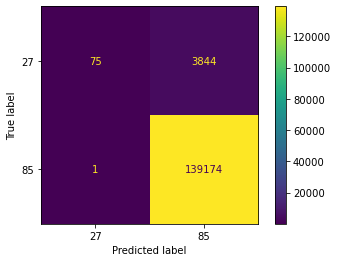

In [54]:
#evaluate model using confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [55]:
from sklearn.metrics import classification_report

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          27       0.99      0.02      0.04      3919
          85       0.97      1.00      0.99    139175

    accuracy                           0.97    143094
   macro avg       0.98      0.51      0.51    143094
weighted avg       0.97      0.97      0.96    143094



#Checking predictions accuracy with a different dataset
(September 2022 BOC Data)

DATA SOURCE: https://customs.gov.ph/import-reports/

In [57]:
#loading dataset
#loading HS Chapters csv file
file2 = "C:\\Users\\Dominic\\CIIT\\Guide\\DailyfiledSept2022.xlsx"
data_2022 = pd.read_excel(file2)
data_2022.head()

,HSCODE,COUNTRYORIGIN,COUNTRYEXPORT,GROSSMASSKGS,NETMASSKGS,CUSTOMSVALUE,CURRENCY,DUTIABLE_FOREIGN,EXCHANGE_RATE,DUTIABLEVALUEPHP,FREIGHT,INSURANCE,ARRASTRE,PREF_CODE,DUTY_PAID,VATTAXBASE,VAT_PAID,EXCISEADVALOREM,DUTIESTAXES,GOODSDESCRIPTION,UOM,QUANTITY
0,85389020000,MY,MALAYSIA,5.39,3.64,250.0,USD,270.68,56.008,15160.25,15.68,5.0,0.0,NaN,151.60,15897.97,1907.76,0.0,2059.36,1.00 SET MEGGER LINEAR TRANSDUCE,NaN,NaN
1,85444299000,MY,MALAYSIA,5.18,3.49,240.0,USD,259.85,56.008,14553.68,15.05,4.8,0.0,NaN,1018.76,16158.56,1939.03,0.0,2957.79,3.00 SET TESTING CABLE RED & BLACK WITH CLIPPER,NaN,NaN
2,85389019000,MY,MALAYSIA,4.31,2.91,200.0,USD,216.54,56.008,12127.97,12.54,4.0,0.0,NaN,121.28,12835.37,1540.24,0.0,1661.52,1.00 SET SF6 GAS FILLING DEVICE,NaN,NaN
3,63079069000,MY,MALAYSIA,1.08,0.73,50.0,USD,54.14,56.008,3032.28,3.14,1.0,0.0,NaN,30.32,3648.72,437.85,0.0,468.17,1.00 SET SAFETY HARNESS,NaN,NaN
4,85444299000,MY,MALAYSIA,0.86,0.58,40.0,USD,43.31,56.008,2425.71,2.51,0.8,0.0,NaN,169.80,3181.63,381.80,0.0,551.60,1.00 PC 30 EXTENSION REEL,NaN,NaN


In [58]:
hschapters.head()

,HS Code,Product descriptions
0,1,Live animals
1,2,Meat
2,3,Fish and crustaceans
3,4,Dairy produce
4,5,Products of animal origin


In [59]:
data_2022['MONTH'] = month[0]
data_2022['YEAR'] = year[0]

In [60]:
#Create new columns for HSCODE2
hs2 = data_2022['HSCODE'].astype(str).str[:2].astype('int').tolist()
data_2022.insert(loc=1, column='HSCODE2', value=hs2)
data_2022

,HSCODE,HSCODE2,COUNTRYORIGIN,COUNTRYEXPORT,GROSSMASSKGS,NETMASSKGS,CUSTOMSVALUE,CURRENCY,DUTIABLE_FOREIGN,EXCHANGE_RATE,DUTIABLEVALUEPHP,FREIGHT,INSURANCE,ARRASTRE,PREF_CODE,DUTY_PAID,VATTAXBASE,VAT_PAID,EXCISEADVALOREM,DUTIESTAXES,GOODSDESCRIPTION,UOM,QUANTITY,MONTH,YEAR
0,85389020000,85,MY,MALAYSIA,5.39,3.64,250.00,USD,270.68,56.008,1.516025e+04,15.68,5.00,0.00,NaN,151.60,1.589797e+04,1.907760e+03,0.00,2.059360e+03,1.00 SET MEGGER LINEAR TRANSDUCE,NaN,NaN,Sep,2021
1,85444299000,85,MY,MALAYSIA,5.18,3.49,240.00,USD,259.85,56.008,1.455368e+04,15.05,4.80,0.00,NaN,1018.76,1.615856e+04,1.939030e+03,0.00,2.957790e+03,3.00 SET TESTING CABLE RED & BLACK WITH CLIPPER,NaN,NaN,Sep,2021
2,85389019000,85,MY,MALAYSIA,4.31,2.91,200.00,USD,216.54,56.008,1.212797e+04,12.54,4.00,0.00,NaN,121.28,1.283537e+04,1.540240e+03,0.00,1.661520e+03,1.00 SET SF6 GAS FILLING DEVICE,NaN,NaN,Sep,2021
3,63079069000,63,MY,MALAYSIA,1.08,0.73,50.00,USD,54.14,56.008,3.032280e+03,3.14,1.00,0.00,NaN,30.32,3.648720e+03,4.378500e+02,0.00,4.681700e+02,1.00 SET SAFETY HARNESS,NaN,NaN,Sep,2021
4,85444299000,85,MY,MALAYSIA,0.86,0.58,40.00,USD,43.31,56.008,2.425710e+03,2.51,0.80,0.00,NaN,169.80,3.181630e+03,3.818000e+02,0.00,5.516000e+02,1.00 PC 30 EXTENSION REEL,NaN,NaN,Sep,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732835,27011900000,27,ID,INDONESIA,66800000.00,66800000.00,27881652.00,USD,28419030.77,57.140,1.623863e+09,529056.00,8322.77,534400.00,AFTA,0.00,1.637678e+09,1.965214e+08,10020000.00,2.065414e+08,INDONESIAN STEAM COAL,NaN,66800.00,Sep,2021
732836,27111900000,27,CN,CHINA,1366294.01,1366294.01,851582.07,USD,985627.40,57.073,5.625271e+07,98562.74,35482.59,150301.58,NaN,0.00,6.055707e+07,7.266848e+06,4053360.93,1.132021e+07,PRESSURIZED LPG MIXTURE,Kilogram,1351120.31,Sep,2021
732837,27111900000,27,CN,CHINA,618503.99,618503.99,385500.42,USD,446181.04,57.073,2.546489e+07,44618.10,16062.52,68039.62,NaN,0.00,2.750960e+07,3.301152e+06,1901399.07,5.202551e+06,PRESSURIZED LPG MIXTURE,Kilogram,633799.69,Sep,2021
732838,27111900000,27,CN,CHINA,2499888.00,2499888.00,1516640.84,USD,1755371.34,57.073,1.001843e+08,175537.13,63193.37,275045.65,NaN,0.00,1.081772e+08,1.298126e+07,7501245.00,2.048251e+07,PRESSURIZED LPG MIXTURE,Kilogram,2500415.00,Sep,2021


In [61]:
#Merge two dataframe
new_df2 = data_2022.merge(hschapters,how='left', left_on='HSCODE2', right_on='HS Code').drop(columns=['HS Code'])
new_df2

,HSCODE,HSCODE2,COUNTRYORIGIN,COUNTRYEXPORT,GROSSMASSKGS,NETMASSKGS,CUSTOMSVALUE,CURRENCY,DUTIABLE_FOREIGN,EXCHANGE_RATE,DUTIABLEVALUEPHP,FREIGHT,INSURANCE,ARRASTRE,PREF_CODE,DUTY_PAID,VATTAXBASE,VAT_PAID,EXCISEADVALOREM,DUTIESTAXES,GOODSDESCRIPTION,UOM,QUANTITY,MONTH,YEAR,Product descriptions
0,85389020000,85,MY,MALAYSIA,5.39,3.64,250.00,USD,270.68,56.008,1.516025e+04,15.68,5.00,0.00,NaN,151.60,1.589797e+04,1.907760e+03,0.00,2.059360e+03,1.00 SET MEGGER LINEAR TRANSDUCE,NaN,NaN,Sep,2021,Electrical machinery & equipment
1,85444299000,85,MY,MALAYSIA,5.18,3.49,240.00,USD,259.85,56.008,1.455368e+04,15.05,4.80,0.00,NaN,1018.76,1.615856e+04,1.939030e+03,0.00,2.957790e+03,3.00 SET TESTING CABLE RED & BLACK WITH CLIPPER,NaN,NaN,Sep,2021,Electrical machinery & equipment
2,85389019000,85,MY,MALAYSIA,4.31,2.91,200.00,USD,216.54,56.008,1.212797e+04,12.54,4.00,0.00,NaN,121.28,1.283537e+04,1.540240e+03,0.00,1.661520e+03,1.00 SET SF6 GAS FILLING DEVICE,NaN,NaN,Sep,2021,Electrical machinery & equipment
3,63079069000,63,MY,MALAYSIA,1.08,0.73,50.00,USD,54.14,56.008,3.032280e+03,3.14,1.00,0.00,NaN,30.32,3.648720e+03,4.378500e+02,0.00,4.681700e+02,1.00 SET SAFETY HARNESS,NaN,NaN,Sep,2021,Other made up textile articles
4,85444299000,85,MY,MALAYSIA,0.86,0.58,40.00,USD,43.31,56.008,2.425710e+03,2.51,0.80,0.00,NaN,169.80,3.181630e+03,3.818000e+02,0.00,5.516000e+02,1.00 PC 30 EXTENSION REEL,NaN,NaN,Sep,2021,Electrical machinery & equipment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732835,27011900000,27,ID,INDONESIA,66800000.00,66800000.00,27881652.00,USD,28419030.77,57.140,1.623863e+09,529056.00,8322.77,534400.00,AFTA,0.00,1.637678e+09,1.965214e+08,10020000.00,2.065414e+08,INDONESIAN STEAM COAL,NaN,66800.00,Sep,2021,"Mineral fuels, oils and products"
732836,27111900000,27,CN,CHINA,1366294.01,1366294.01,851582.07,USD,985627.40,57.073,5.625271e+07,98562.74,35482.59,150301.58,NaN,0.00,6.055707e+07,7.266848e+06,4053360.93,1.132021e+07,PRESSURIZED LPG MIXTURE,Kilogram,1351120.31,Sep,2021,"Mineral fuels, oils and products"
732837,27111900000,27,CN,CHINA,618503.99,618503.99,385500.42,USD,446181.04,57.073,2.546489e+07,44618.10,16062.52,68039.62,NaN,0.00,2.750960e+07,3.301152e+06,1901399.07,5.202551e+06,PRESSURIZED LPG MIXTURE,Kilogram,633799.69,Sep,2021,"Mineral fuels, oils and products"
732838,27111900000,27,CN,CHINA,2499888.00,2499888.00,1516640.84,USD,1755371.34,57.073,1.001843e+08,175537.13,63193.37,275045.65,NaN,0.00,1.081772e+08,1.298126e+07,7501245.00,2.048251e+07,PRESSURIZED LPG MIXTURE,Kilogram,2500415.00,Sep,2021,"Mineral fuels, oils and products"


In [62]:
#correcting data types
new_df2["YEAR"] = new_df2["YEAR"].astype(int)
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732840 entries, 0 to 732839
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HSCODE                732840 non-null  int64  
 1   HSCODE2               732840 non-null  int64  
 2   COUNTRYORIGIN         732840 non-null  object 
 3   COUNTRYEXPORT         732840 non-null  object 
 4   GROSSMASSKGS          732840 non-null  float64
 5   NETMASSKGS            732840 non-null  float64
 6   CUSTOMSVALUE          732840 non-null  float64
 7   CURRENCY              732840 non-null  object 
 8   DUTIABLE_FOREIGN      732840 non-null  float64
 9   EXCHANGE_RATE         732840 non-null  float64
 10  DUTIABLEVALUEPHP      732840 non-null  float64
 11  FREIGHT               732840 non-null  float64
 12  INSURANCE             732840 non-null  float64
 13  ARRASTRE              732840 non-null  float64
 14  PREF_CODE             172697 non-null  object 
 15  

In [63]:
#checking for missing values
new_df2.isnull().sum()

HSCODE                       0
HSCODE2                      0
COUNTRYORIGIN                0
COUNTRYEXPORT                0
GROSSMASSKGS                 0
NETMASSKGS                   0
CUSTOMSVALUE                 0
CURRENCY                     0
DUTIABLE_FOREIGN             0
EXCHANGE_RATE                0
DUTIABLEVALUEPHP             0
FREIGHT                      0
INSURANCE                    0
ARRASTRE                     0
PREF_CODE               560143
DUTY_PAID                    0
VATTAXBASE                   0
VAT_PAID                     0
EXCISEADVALOREM              0
DUTIESTAXES                  0
GOODSDESCRIPTION             0
UOM                     588092
QUANTITY                514944
MONTH                        0
YEAR                         0
Product descriptions         0
dtype: int64

In [64]:
#dropping missing values in specific column
new_df2.dropna(subset=["COUNTRYORIGIN"],inplace=True)

In [65]:
#dropping columns with missing values
new_df2 = new_df2.drop(columns={"PREF_CODE","UOM","QUANTITY"})

In [66]:
#rechecking missing values
new_df2.isnull().sum()

HSCODE                  0
HSCODE2                 0
COUNTRYORIGIN           0
COUNTRYEXPORT           0
GROSSMASSKGS            0
NETMASSKGS              0
CUSTOMSVALUE            0
CURRENCY                0
DUTIABLE_FOREIGN        0
EXCHANGE_RATE           0
DUTIABLEVALUEPHP        0
FREIGHT                 0
INSURANCE               0
ARRASTRE                0
DUTY_PAID               0
VATTAXBASE              0
VAT_PAID                0
EXCISEADVALOREM         0
DUTIESTAXES             0
GOODSDESCRIPTION        0
MONTH                   0
YEAR                    0
Product descriptions    0
dtype: int64

In [67]:
#checking duplicates
new_df2.duplicated().sum()

14035

In [68]:
#dropping duplicates and rechecking duplicates
new_df2.drop_duplicates(inplace=True)
new_df2.duplicated().sum()

0

In [69]:
#creating preprocess dataframe
new_df2_processed = new_df2.copy(deep=True)

###EDA

(array([0.e+00, 1.e+09, 2.e+09, 3.e+09, 4.e+09, 5.e+09, 6.e+09, 7.e+09]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

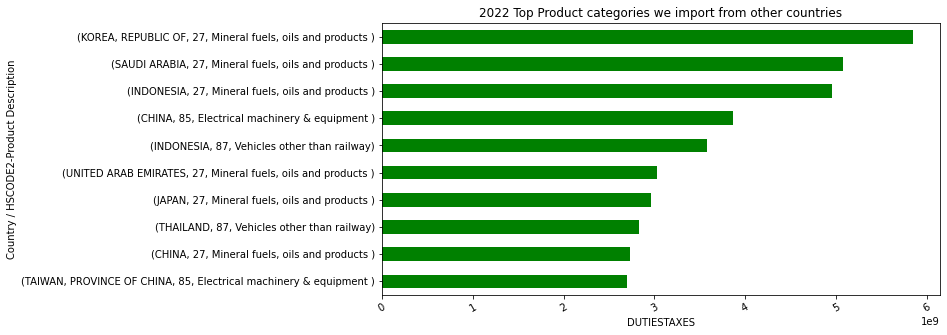

In [70]:
#plotting top product categories we import into the country
fig = plt.figure(figsize=(10,5))
top_products = new_df2_processed.groupby(["COUNTRYEXPORT","HSCODE2","Product descriptions"])["DUTIESTAXES"].sum().sort_values(ascending=True).tail(10)
top_products.plot(kind="barh", color="g")

#adding labels
plt.ylabel("Country / HSCODE2-Product Description")
plt.xlabel("DUTIESTAXES")
plt.title("2022 Top Product categories we import from other countries")
plt.xticks(rotation=30)